# Basic Plotting: Introduction to ```matplotlib```

In this section, we will:
- Create basic plots using ```matplotlib.pyplot```
- Put axis labels and titles
- Create multiple plots (subplots) in the same figure
- Change the scales of x and y axes
- Create common types of plots: Histograms, boxplots, scatter plots etc. 
- Working with images

```matplotlib``` is a python library. It contains the ```pyplot``` module, which is basically a collection of functions such as ```plot```, ```title```, ```show()``` etc. ```pyplot``` is one of the most commonly used module for creating a variety of plots such as line plots, bar plots, histograms etc. 

Let's start with the basics.

## Basic Plotting, Axes Labels and Titles

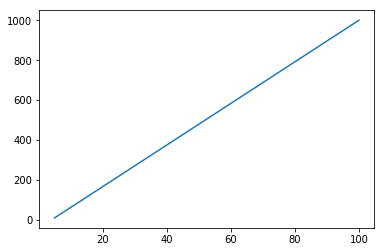

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting two 1-D numpy arrays
x = np.linspace(5, 100, 100)
y = np.linspace(10, 1000, 100)

plt.plot(x, y)
plt.show()

In [3]:
# need to call plt.show() explicitly to display the plot
plt.show()

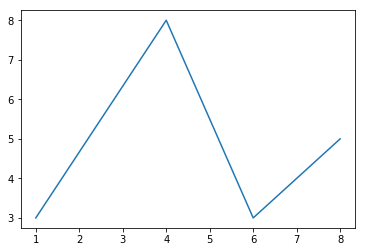

In [4]:
# can also work with lists, though it converts lists to np arrays internally
plt.plot([1, 4, 6, 8], [3, 8, 3, 5])
plt.show()

Let's see how to put labels and the x and y axes and the chart title. 

Also, you can specify the limits of x and y labels as a range using ```xlim([xmin, xmax])``` and ```ylim([ymin, ymax])```.


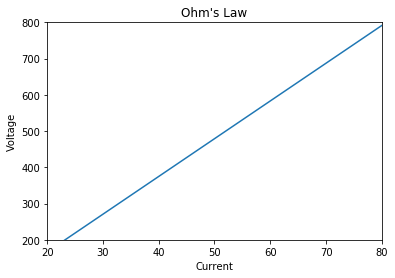

In [40]:
# Axis labels and title
plt.plot(x, y)

# x and y labels, and title
plt.xlabel("Current")
plt.ylabel("Voltage")
plt.title("Ohm's Law")

# Define the range of labels of the axis 
# Arguments: plt.axis(xmin, xmax, ymin, ymax)
plt.xlim([20, 80])
plt.ylim([200, 800])
plt.show()

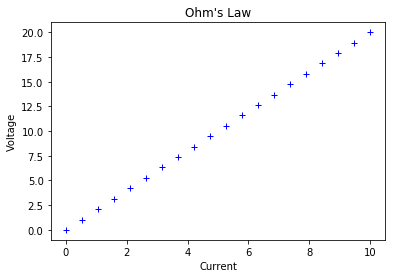

In [41]:
# Change the colors and line type

# initialising x and y arrays
x = np.linspace(0, 10, 20)
y = x*2

# color blue, line type '+'
plt.plot(x, y, 'b+')

# put x and y labels, and the title
plt.xlabel("Current")
plt.ylabel("Voltage")
plt.title("Ohm's Law")

plt.show()


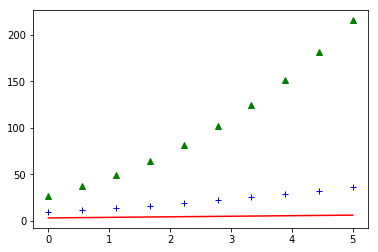

In [42]:
# Plotting multiple lines on the same plot

x = np.linspace(0, 5, 10)
y = np.linspace(3, 6, 10)

# plot three curves: y, y**2 and y**3 with different line types
plt.plot(x, y, 'r-', x, y**2, 'b+', x, y**3, 'g^')
plt.show()

## Figures and Subplots

You often need to create multiple plots in the same figure, as we'll see in some upcoming examples.


```matplotlib``` has the concept of **figures and subplots** using which you can create *multiple subplots inside the same figure*.   

To create multiple plots in the same figure, you can use the method ```plt.subplot(nrows, ncols, nsubplot)```.

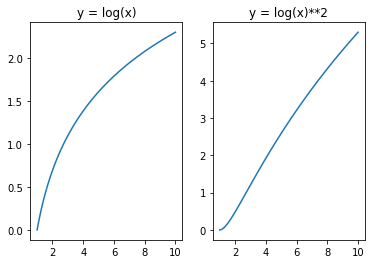

In [23]:
x = np.linspace(1, 10, 100)
y = np.log(x)

# initiate a new figure explicitly 
plt.figure(1)

# Create a subplot with 1 row, 2 columns 

# create the first subplot in figure 1 
plt.subplot(121)     # equivalent to plt.subplot(1, 2, 1)
plt.title("y = log(x)")
plt.plot(x, y)

# create the second subplot in figure 1
plt.subplot(122)
plt.title("y = log(x)**2")
plt.plot(x, y**2)
plt.show()

Let's see another example - say you want to create 4 subplots in two rows and two columns.

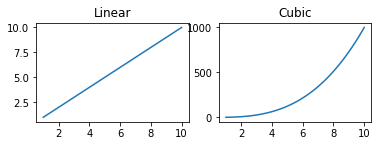

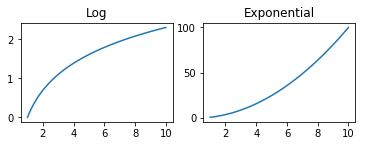

In [24]:
# Example: Create a figure having 4 subplots
x = np.linspace(1, 10, 100)

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(1)

# subplot 1
plt.subplot(2, 2, 1)
plt.title("Linear")
plt.plot(x, x)


# subplot 2 
plt.subplot(2, 2, 2)
plt.title("Cubic")
plt.plot(x, x**3)


# subplot 3
plt.figure(2)
plt.subplot(2, 2, 1)
plt.title("Log")
plt.plot(x, np.log(x))

# subplot 4 
plt.subplot(2, 2, 2)
plt.title("Exponential")
plt.plot(x, x**2)


plt.show()





You can see the list of colors and shapes here: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

## Types of Commonly Used Plots

Let's now use the retail store's sales data to create some commonly use plots such as:
- Boxplots
- Histograms
- Scatter plots
- Bar plots

In [2]:
# Example: Globals sales data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("market_fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


### Boxplot

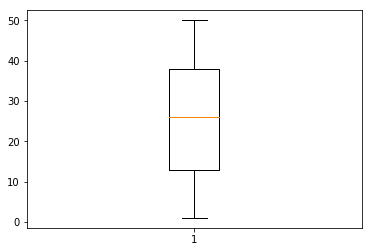

In [13]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['Order_Quantity'])
plt.show()

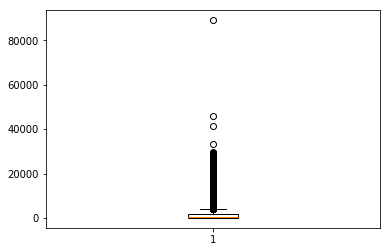

In [14]:
# Boxplot of Sales is quite unreadable, since Sales varies 
# across a wide range
plt.boxplot(df['Sales'])
plt.show()

As you can see, the boxplot of ```Sales``` is pretty unreadable, since Sales varies across a wide range as shown below.

In [28]:
# Range of sales: min is 2.24, median is 449, max is 89061
df['Sales'].describe()

count     8399.000000
mean      1775.878179
std       3585.050525
min          2.240000
25%        143.195000
50%        449.420000
75%       1709.320000
max      89061.050000
Name: Sales, dtype: float64

The solution to this problem is to **change the scale of the axis** (in this case, the y axis) so that the range can fit into the size of the plot.


One commonly used technique is to transform an axis into the **logarithmic scale**. You can transform the scale of an axis using ```plt.yscale('log')```.

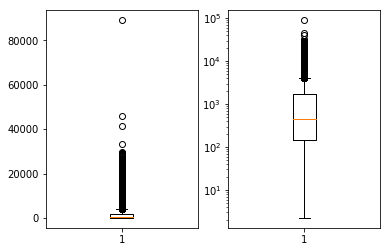

In [29]:
# Usual (linear) scale subplot
plt.subplot(1, 2, 1)
plt.boxplot(df['Sales'])


# log scale subplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Sales'])
plt.yscale('log')
plt.show()

Clearly, the log scale subplot is far more readable - you can infer that the minimum sales is around 0, the median is approximtely in the middle of 100 and 1000, and the max is reaching 100,000.

### Histogram

Histograms are useful for visualising distribution of single variables.

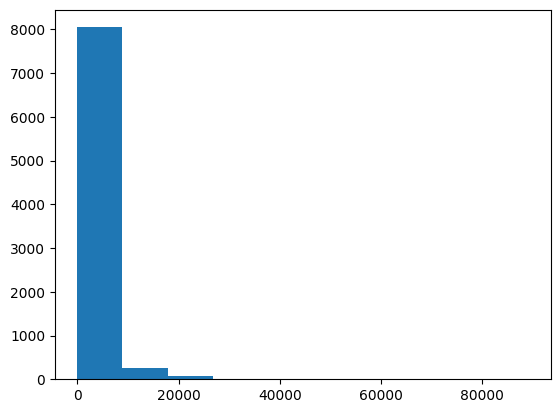

In [3]:
# Histograms

plt.hist(df['Sales'])
plt.show()

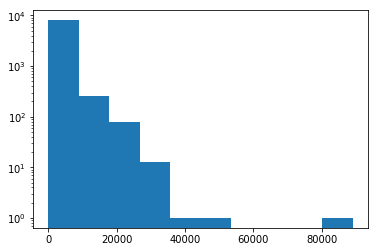

In [31]:
# The histogram can be made more readable by using 
# a log scale

plt.hist(df['Sales'])
plt.yscale('log')
plt.show()

### Scatter Plot

Scatter plots are used to visualise two variables, one one each axis. 

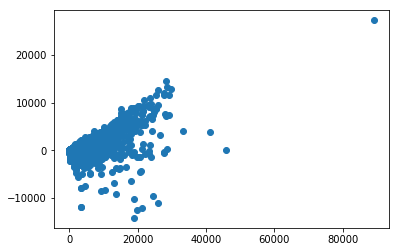

In [32]:
# Scatter plots with two variables: Profit and Sales
plt.scatter(df['Sales'], df['Profit'])
plt.show()


## Working with Images

```matplotlib``` can also read images using the ```plt.imread()``` method. Internally, it reads and stores images as an ```array```. The array can then be used for various data manipulation tasks, just as a normal array.
Let's look at an example.

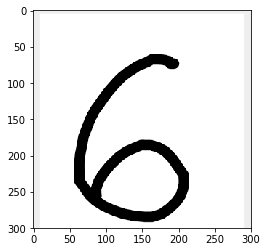

In [33]:
# reading a PNG image
image = plt.imread("number.png")
plt.imshow(image)
plt.show()

In [34]:
# looking at attributes of the image 

print(type(image))
print(image.shape)
print(image.dtype)

<class 'numpy.ndarray'>
(300, 300, 3)
float32


Note that it is a 3-D array of size 300 x 300 x 3, and each element is stored as type float32. Let's look at the content of the array.

In [35]:
# print the array
image

array([[[ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        ..., 
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334]],

       [[ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        ..., 
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334]],

       [[ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        ..., 
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334],
        [ 0.93333334,  0.93333334,  0.93333334]],

       ..., 
       [[ 0.93333334,  0.93333334,  0.93333334],
        

In the array, each inner list is of dimension size =3 and represents a pixel. Since this is an RGB image, there are 3 pixels (other types of images are RGBA, where A is alpha and represents transparency).

We will not discuss images in detail in this module, though we'll work with them later in some machine learning modeling exercises. 

In the next section, we will learn to visualise distributions using an differnt visualisation library, seaborn.

## Matplotlib Resources
1. <a href="https://matplotlib.org/users/pyplot_tutorial.html">Official documentation</a>
2. <a href="https://github.com/rougier/matplotlib-tutorial">Matplotlib tutorial showing a variety of plots</a>
